In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier

import warnings
warnings.filterwarnings ("ignore")

In [99]:
filename = 'MPtrain.csv'
data =pd.read_csv(filename)
df = pd.DataFrame (data)

In [100]:
df.head()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,0,0,0,0,0,1,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,1,1,1,1,1,0,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,1,1,1,1,1,0,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,0,1,0,0,1,0,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,1,1,0,1,0,1


In [101]:
print ("Shape of data: {}" . format (df.shape))
print ("Number of rows: {}" . format (df.shape [0]))
print ("Number of columns: {}" . format (df.shape [1]))

Shape of data: (2000, 21)
Number of rows: 2000
Number of columns: 21


In [102]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Battery_Power  2000 non-null   int64  
 1   Clock_Speed    2000 non-null   float64
 2   FC             2000 non-null   int64  
 3   Int_Memory     2000 non-null   int64  
 4   Mobile_D       2000 non-null   float64
 5   Mobile_W       2000 non-null   int64  
 6   Cores          2000 non-null   int64  
 7   PC             2000 non-null   int64  
 8   Pixel_H        2000 non-null   int64  
 9   Pixel_W        2000 non-null   int64  
 10  Ram            2000 non-null   int64  
 11  Screen_H       2000 non-null   int64  
 12  Screen_W       2000 non-null   int64  
 13  Talk_Time      2000 non-null   int64  
 14  Four_G         2000 non-null   int64  
 15  Three_G        2000 non-null   int64  
 16  Touch_Screen   2000 non-null   int64  
 17  Dual_SIM       2000 non-null   int64  
 18  Bluetoot

In [103]:
df.describe (include = "all").T

,count,mean,std,min,25%,50%,75%,max
Battery_Power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
Clock_Speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
FC,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
Int_Memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
Mobile_D,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
Mobile_W,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
Cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
PC,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
Pixel_H,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
Pixel_W,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


In [104]:
df.isnull ().sum ()

Battery_Power    0
Clock_Speed      0
FC               0
Int_Memory       0
Mobile_D         0
Mobile_W         0
Cores            0
PC               0
Pixel_H          0
Pixel_W          0
Ram              0
Screen_H         0
Screen_W         0
Talk_Time        0
Four_G           0
Three_G          0
Touch_Screen     0
Dual_SIM         0
Bluetooth        0
WiFi             0
Price_Range      0
dtype: int64

In [105]:
def checkNull (d):    
    is_Null = d.isnull ().sum ().to_frame (name = 'is_Null').T
    is_Na = d.isna ().sum ().to_frame (name = 'is_Na').T
    Unique = d.nunique ().to_frame (name = 'Unique').T
    return pd.concat ([Unique , is_Na , is_Null]) 
checkNull (df)

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
Unique,1094,26,20,63,10,121,8,21,1137,1109,...,15,19,19,2,2,2,2,2,2,4
is_Na,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
is_Null,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


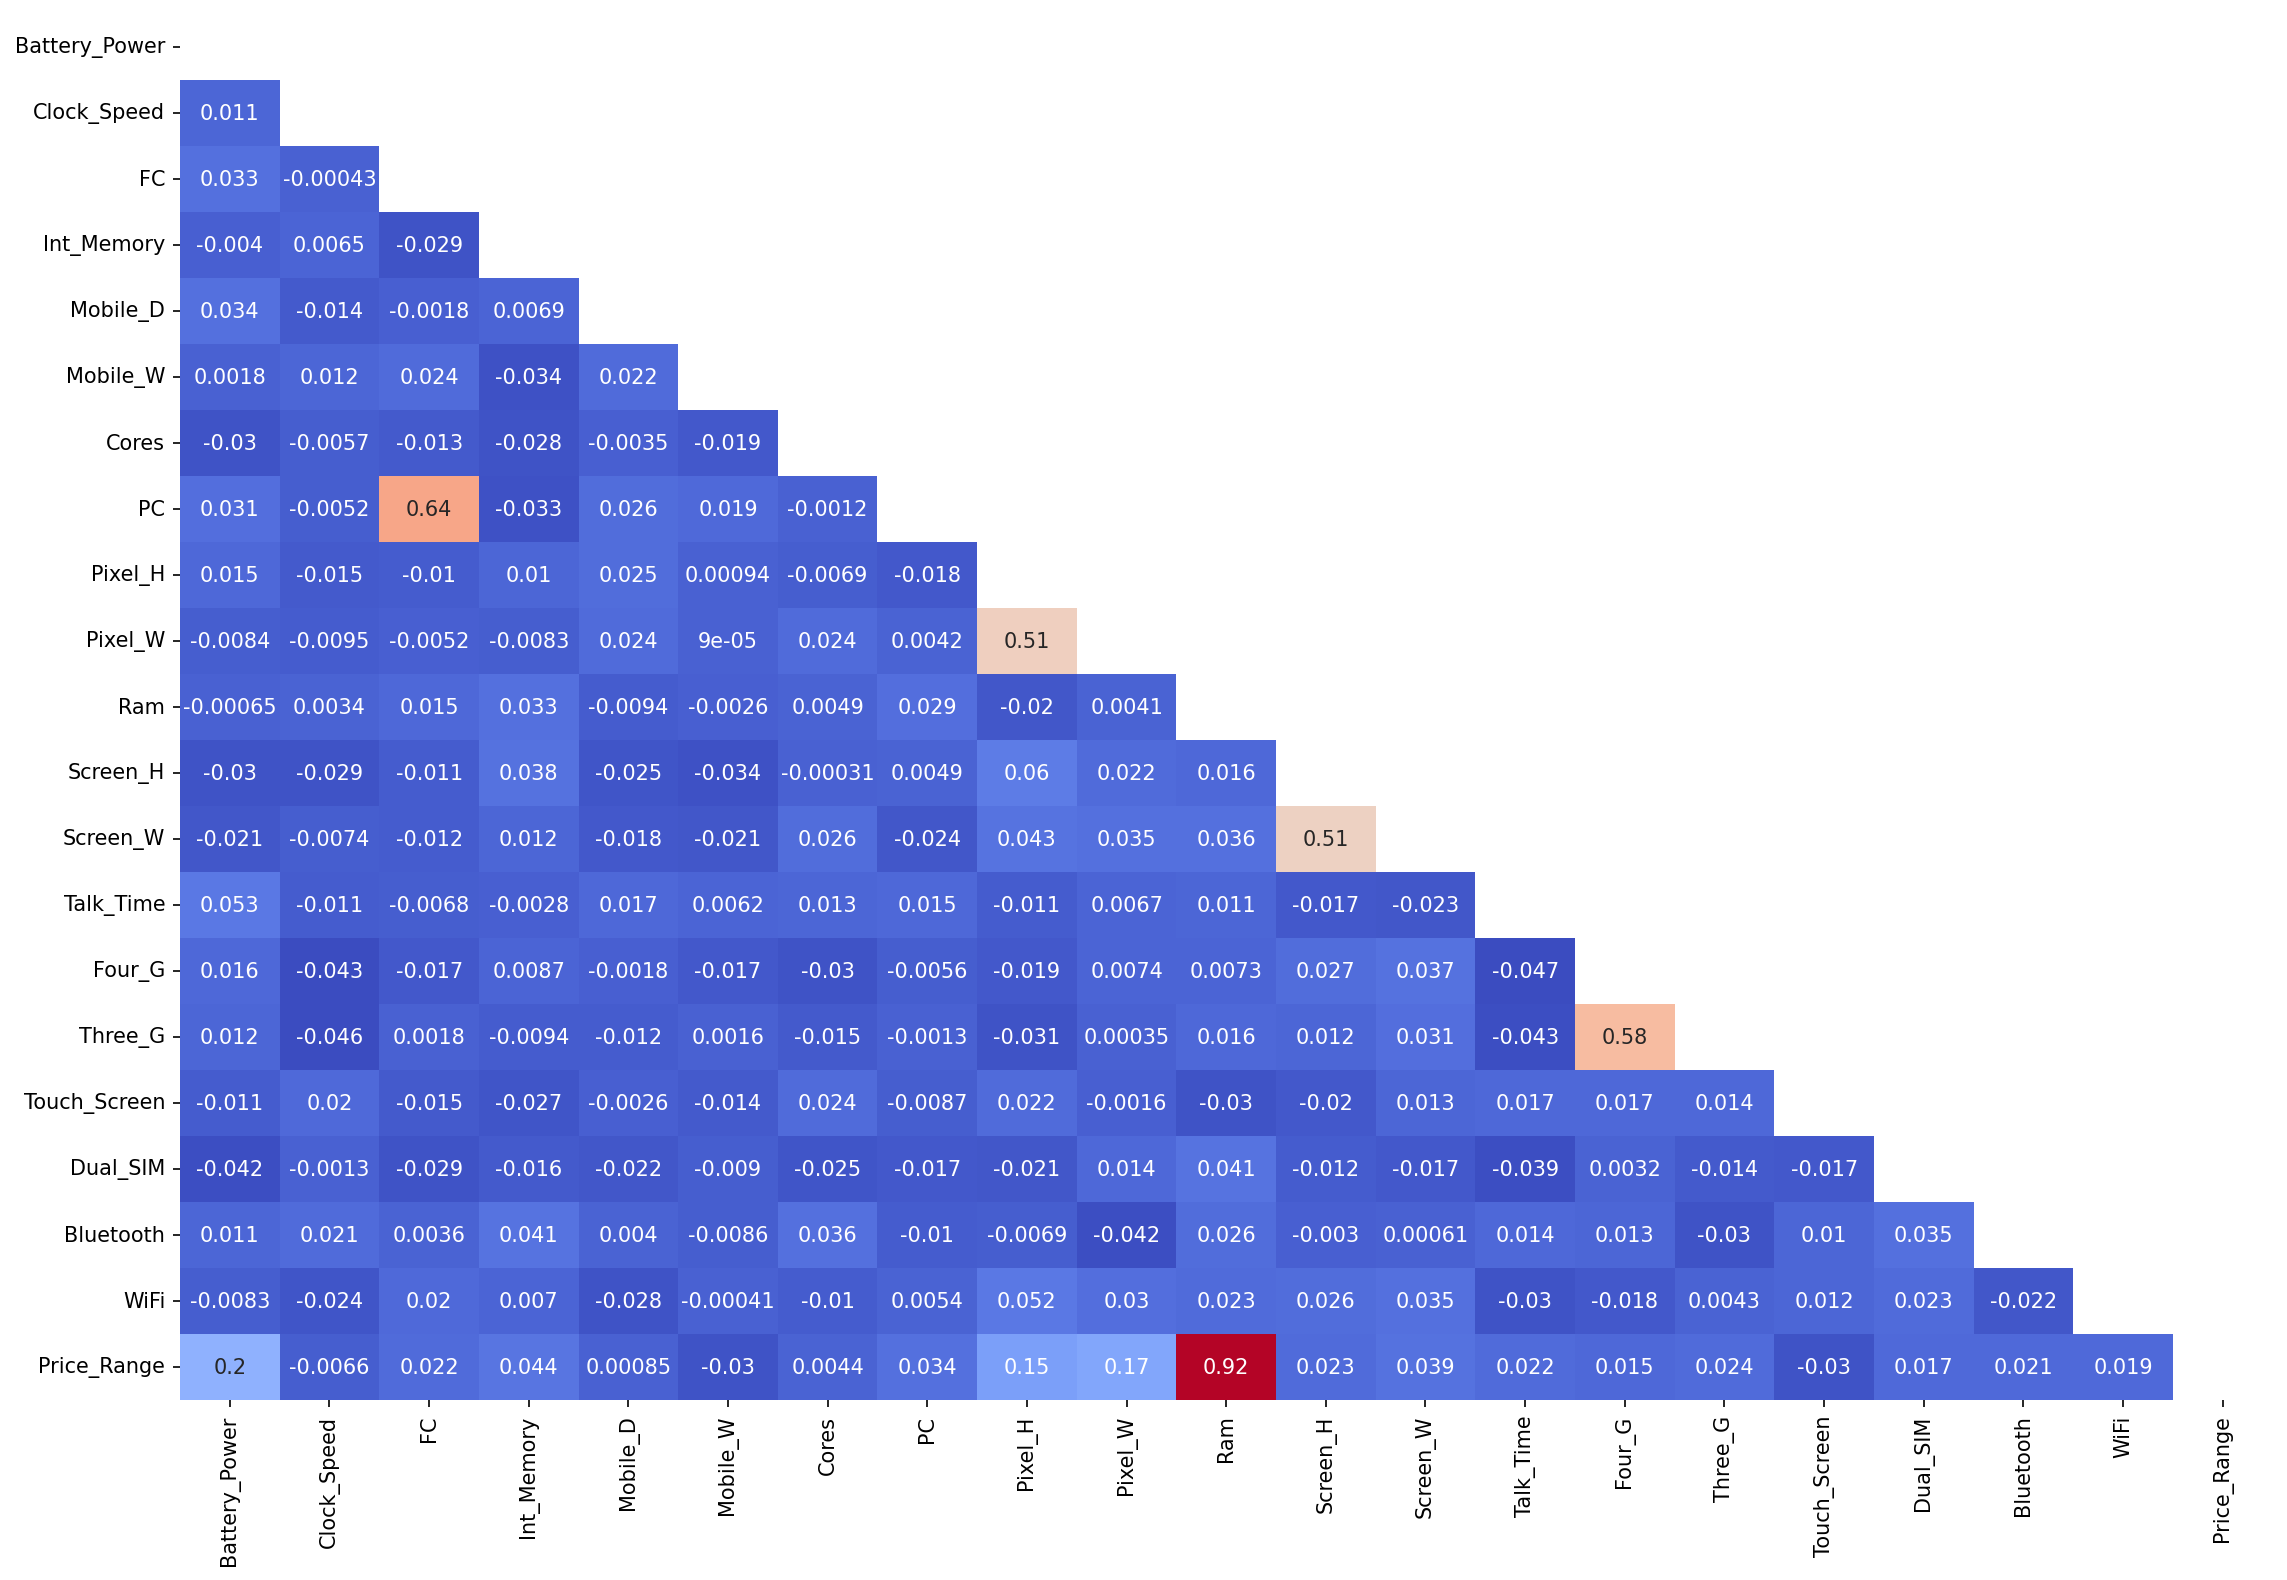

In [106]:
plt.figure (figsize = [18,12] ,  dpi = 150 )
matrix = np.triu (df.corr ())
sns.heatmap (df.corr(), annot = True, cmap = 'coolwarm', mask = matrix , cbar = False)
plt.show ()

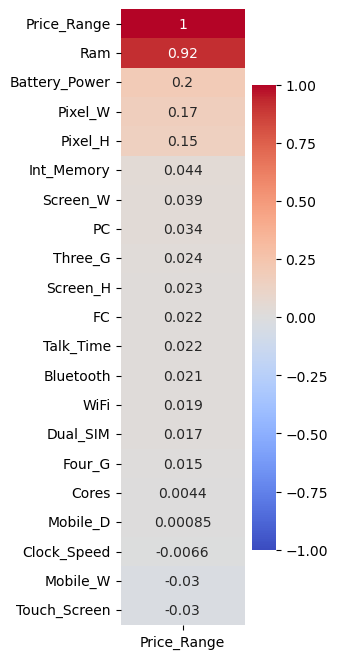

In [107]:
plt.figure (figsize = (2 , 8) , dpi = 100)
heatmap = sns.heatmap (df.corr()[['Price_Range']].sort_values (by = 'Price_Range', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')


In [108]:
print ("Duplicate values in df are:" , df.duplicated ().sum ())

Duplicate values in df are: 0


In [109]:
print (df ['Cores'].unique ())
print (df ['Four_G'].unique ())
print (df ['Three_G'].unique ())
print (df ['Touch_Screen'].unique ())
print (df ['Dual_SIM'].unique ())
print (df ['Bluetooth'].unique ())
print (df ['WiFi'].unique ())
print (df ['Price_Range'].unique ())

[2 3 5 6 1 8 4 7]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 2 3 0]


In [110]:
X = df.drop(['Price_Range'] , axis = 1)

y = df ["Price_Range"].values.reshape (-1 , 1)

In [111]:
from sklearn.model_selection import train_test_split

# # Training will be based on 90% of data
X_train , X_test , y_train , y_test = train_test_split (X , y.ravel() , test_size = 0.1 , random_state = 0)

In [112]:
print ("Number of rows in train data =" , X_train.shape [0])
print ("Number of rows in test data =" , X_test.shape [0])

Number of rows in train data = 1800
Number of rows in test data = 200


In [113]:
from sklearn.metrics import f1_score

# true labels and predicted labels
y_true = [0, 1, 1, 0, 1, 0, 0]
y_pred = [0, 1, 0, 0, 1, 1, 0]

# calculate F1 score
f1 = f1_score(y_true, y_pred)

print("F1 score:", f1)

F1 score: 0.6666666666666666


In [114]:
#Using SKlearn Library

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

DT_Clf = DecisionTreeClassifier (max_depth = 3)
DT_Clf.fit (X_train , y_train)
y_pred = DT_Clf.predict (X_test)
print ("Accuracy:" , metrics.accuracy_score (y_test , y_pred))

Accuracy: 0.775


In [115]:
#Using XGBoost library
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBClassifier
xgb_model = xgb.XGBClassifier()
xgb_clf = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost DT Accuracy:",accuracy)

XGBoost DT Accuracy: 0.9075


In [116]:
#Using SKlearn Library

from sklearn.ensemble import RandomForestClassifier

RF_Clf = RandomForestClassifier (n_estimators = 50 , max_depth = 3)
RF_Clf.fit (X_train , y_train)
y_pred = RF_Clf.predict (X_test)
print ("Accuracy:" , metrics.accuracy_score (y_test , y_pred))

Accuracy: 0.81


In [117]:
#Using XGBoost library

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBRFClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Random Forest Accuracy:" ,accuracy_xgb)

XGBoost Random Forest Accuracy: 0.8675
